In [1]:
import numpy as np #import numpy
import pandas as pd # import pandas
import seaborn as sns # import seaborn
import matplotlib.pyplot as plt  # seaborn is based on matplotlib.pyplot lib of functions
sns.set(color_codes=True) #to get color rich graphs
cgf=pd.read_csv('CardioGoodFitness.csv') #import the Dataset CardioGoodFitness

In [2]:
#Structure of Data

cgf.head() #get first five rows of CardioGoodFitness dataframe 

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [3]:
#Understand structure of Data
cgf.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [4]:
cgf.skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

<font color='green'><b>
    Observation:</b></font><br><font color='purple'><b>
    Top Product is TM195 with 80 occurances.<br><br>
    Top users are Male with 104 occurances.<br><br>
    Top Marital Status is Partnered with 107 occurances.<br><br>
    Age is moderately right skewed since mean(Age)> median(Age), 50% of the users of Product lie between 24-33 years.<br><br>
    Fitness is approximately symmetrical [very slightly right skewed since mean(Fitness)> median(Fitness)].<br><br>
    Income is highly right skewed since mean(Income)> median(Income), income of 50% of the users of Product lie between 44k-58k.<br><br>
    Miles is highly right skewed since mean(Miles)> median(Miles).<br><br>
    Usage is moderately right skewed since mean(Usage)> median(Usage).<br><br>
    Education level is moderately Left skewed since mean(Education) < median(Age).
    

In [5]:
#Structure of Data

cgf.info() #Check if any of the columns have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


<font color='green'><b>
    Observation:</b></font><br><font color="purple"><b>
    No column has any null value, so the data can be plotted without removing any values/rows.

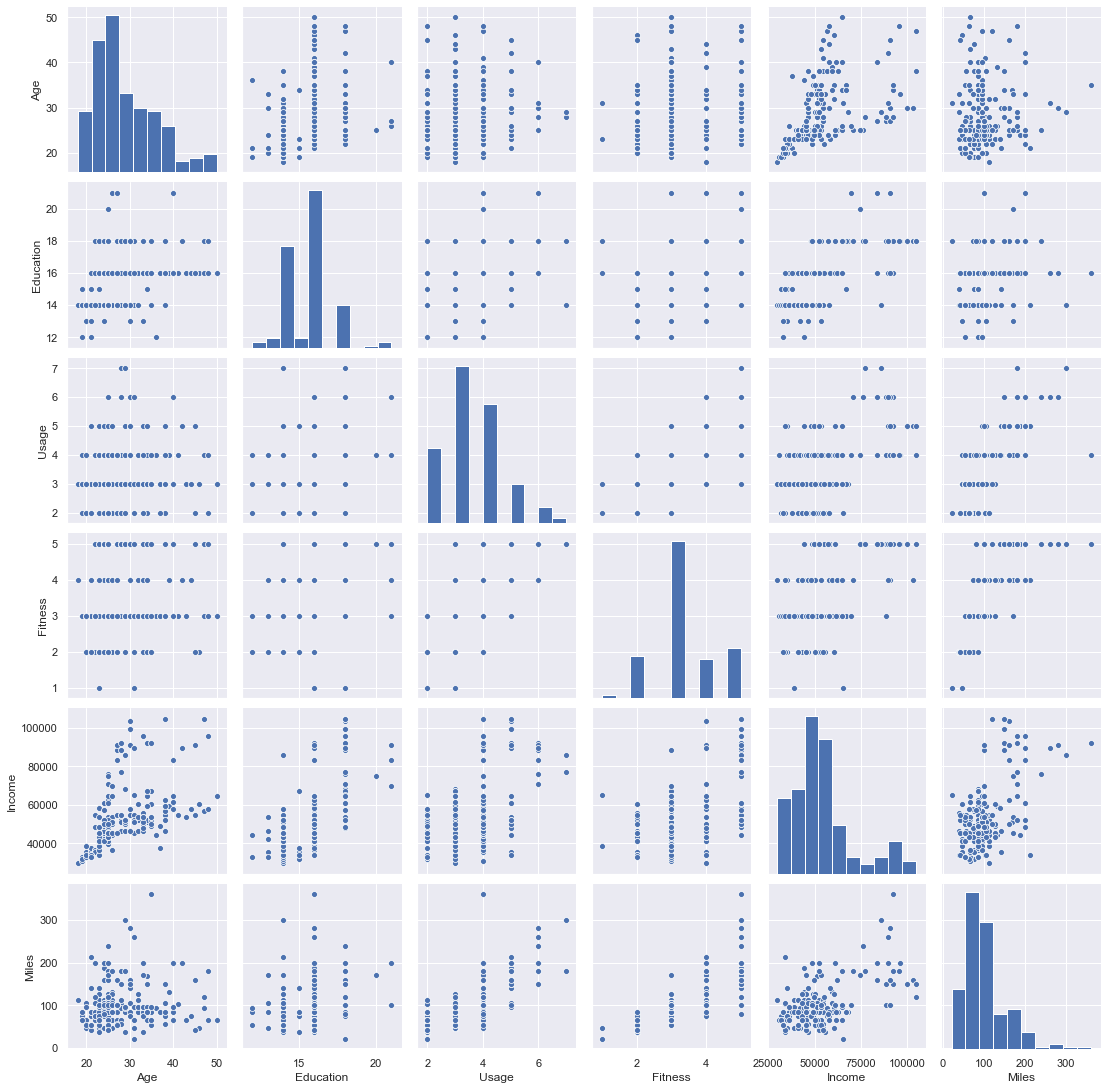

In [6]:
#Multivariate Data Analysis and Visualization
sns.pairplot(cgf); # relationship between different numeric data columns

<font color='green'><b>
    Observation:</b></font><br><font color='purple'><b>
    Positive correlation between miles and fitness.<br>
    Positive correlation betweem usage and fitness.<br>   

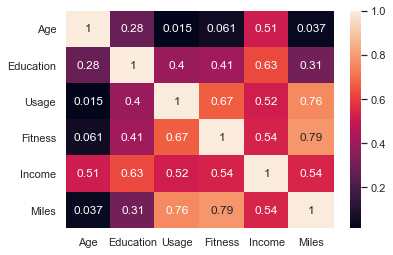

In [7]:
corr = cgf.corr()
#print(corr)
sns.heatmap(corr, annot=True); #correlation matrix between different columns

<font color='green'><b>
    Observation:</b></font><br><font color='purple'><b>
    High correlation between fitness and miles. The positive correlation is evident from previous pair plot as well.<br>
    High correlation between fitness and usage. The positive correlation is evident from previous pair plot as well.<br>
    Another correlation is between Education and Income.
    

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64


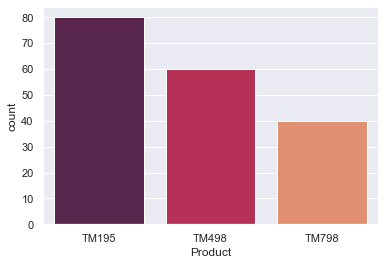

In [8]:
#Univariate Data Analysis and Visualization

print(cgf['Product'].value_counts()) #Get total number of users for each treadmill product
sns.countplot(x=cgf['Product'],palette="rocket"); #plot the count for each treadmill product

<font color='green'><b>
    Observation:</b></font><br><font color="purple"><b>
    Users of TM195=80<br>
    Users of TM498=60<br>
    Users of TM798=40

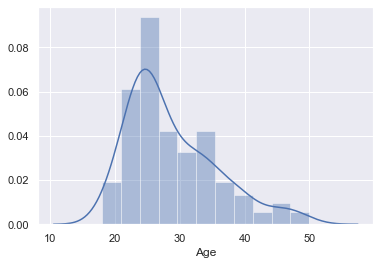

In [9]:
#Univariate Data Analysis and Visualization

sns.distplot(cgf['Age']); #Age distribution plot

<font color='green'><b>
    Observation:</b></font><br><font color="purple"><b>
 Most users of the Treadmill product lie between 20-30 years range

In [10]:
#Analysis of spread and distribution of every feature in the dataset.

#Create Age group (age range) from Age (continous column)

category = pd.cut(cgf.Age,bins=[10,20,30,40,50],labels=['10-20','20-30','30-40','40-50'])
cgf.insert(5,'Age Group',category) #insert 'Age Group' column in the dataframe
cgf.head()

,Product,Age,Gender,Education,MaritalStatus,Age Group,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,10-20,3,4,29562,112
1,TM195,19,Male,15,Single,10-20,2,3,31836,75
2,TM195,19,Female,14,Partnered,10-20,4,3,30699,66
3,TM195,19,Male,12,Single,10-20,3,3,32973,85
4,TM195,20,Male,13,Partnered,10-20,4,2,35247,47


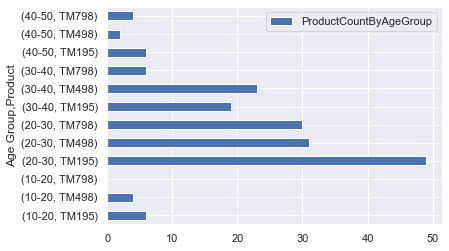

In [11]:
#Multivariate Data Analysis and Visualization

#Plot popularity of a prodcut in an age group

cgf['ProductCountByAgeGroup'] = np.zeros(len(cgf))
cgf.groupby(['Age Group', 'Product'])[["ProductCountByAgeGroup"]].count().plot(kind='barh')

<font color='green'><b>
    Observation:</b></font><br><font color=Purple><b>
Looking at ProductCountByAgeGroup, in every age group, TM195 is the popular product with being most popular in 20-30 age group, except in 30-40 where TM498 is more popular.

In [12]:
#Analysis of spread and distribution of every feature in the dataset.

#Create Income group (income range) from Income (continous column)

category1 = pd.cut(cgf.Income,bins=[20000,30000,40000,50000,60000,70000,80000,90000,100000,110000],labels=['20k-30k','30k-40k','41k-50k','51k-60k','61k-70k','71k-80k','81k-90k','91k-100k','101k-110k'])
cgf.insert(6,'Income Group',category1)
cgf.head()

,Product,Age,Gender,Education,MaritalStatus,Age Group,Income Group,Usage,Fitness,Income,Miles,ProductCountByAgeGroup
0,TM195,18,Male,14,Single,10-20,20k-30k,3,4,29562,112,0.0
1,TM195,19,Male,15,Single,10-20,30k-40k,2,3,31836,75,0.0
2,TM195,19,Female,14,Partnered,10-20,30k-40k,4,3,30699,66,0.0
3,TM195,19,Male,12,Single,10-20,30k-40k,3,3,32973,85,0.0
4,TM195,20,Male,13,Partnered,10-20,30k-40k,4,2,35247,47,0.0


In [13]:
#Multivariate Data Analysis

#List popularity of a prodcut in an income group

cgf['ProductCountByIncomeGroup'] = np.zeros(len(cgf))
cgf.groupby(['Income Group', 'Product'])[["ProductCountByIncomeGroup"]].count()


ProductCountByIncomeGroup
Income Group Product                           
20k-30k      TM195                          1.0
             TM498                          NaN
             TM798                          NaN
30k-40k      TM195                         22.0
             TM498                          9.0
             TM798                          NaN
41k-50k      TM195                         25.0
             TM498                         21.0
             TM798                          5.0
51k-60k      TM195                         26.0
             TM498                         23.0
             TM798                          6.0
61k-70k      TM195                          6.0
             TM498                          7.0
             TM798                          6.0
71k-80k      TM195                          NaN
             TM498                          NaN
             TM798                          4.0
81k-90k      TM195                          NaN
             TM498                          NaN
             TM798                          7.0
91k-100k     TM195                          NaN
             TM498                          NaN
             TM798                          9.0
101k-110k    TM195                          NaN
             TM498                          NaN
             TM798                          3.0

<font color='green'><b>
    Observation:</b></font><br>
    <font color=Purple><b>
Looking at ProductCountByIncomeGroup, there are few users above 70k income, and all of them use TM798.<br>


              ProductCountByIncomeGroup
Income Group                           
20k-30k                               1
30k-40k                              31
41k-50k                              51
51k-60k                              55
61k-70k                              19
71k-80k                               4
81k-90k                               7
91k-100k                              9
101k-110k                             3


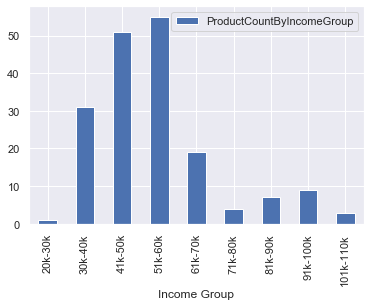

In [14]:
#Multivariate Data Analysis
#Plot popular Income group for the Treadmill users

cgf['ProductCountByIncomeGroup'] = np.zeros(len(cgf))
print(cgf.groupby(['Income Group'])[["ProductCountByIncomeGroup"]].count())

# Data Visualization- plot number of people using treadmill based on their income groups
cgf.groupby(['Income Group'])[["ProductCountByIncomeGroup"]].count().plot(kind='bar');


<font color='green'><b>
    Observation:</b></font><br>
    <font color='purple'><b>
Most of the users of the treadmill products have income in the range of 30k-60k

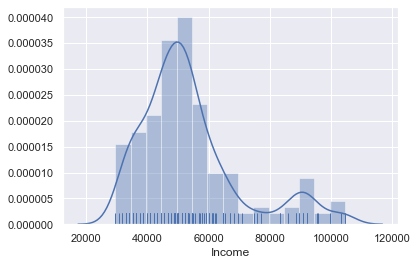

In [15]:
#Univariate Data Analysis and Visualization

sns.distplot(cgf['Income'],kde=True, rug=True); # Plot income buckets

<font color='green'><b>
    Observation:</b></font><br>
    <font color=Purple><b>
The treadmill products are most popular in the income range 30000-60000

  Product MaritalStatus  count
0   TM195     Partnered     48
1   TM195        Single     32
2   TM498     Partnered     36
3   TM498        Single     24
4   TM798     Partnered     23
5   TM798        Single     17


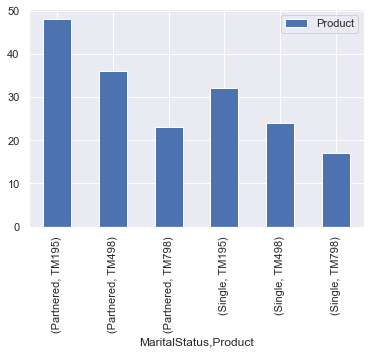

In [16]:
#Multivariate Data Analysis

#Group Product users by their Marital status

df_user_status=cgf.groupby(['Product','MaritalStatus']).size().reset_index().rename(columns={0:'count'})
print(df_user_status)

# Data Visualization- plot Users of the treadmill product based on the Marital Status
cgf.groupby(['MaritalStatus','Product'])[["Product"]].count().plot(kind='bar');

<font color='green'><b>
    Observation:</b></font><br>
    <font color='purple'><b>
For all the Treadmill products TM195, TM498, and TM798, they are most popular with people having partners.

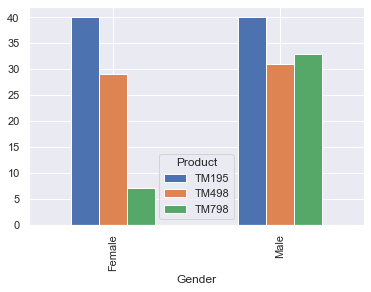

In [17]:
#Multivariate Data Analysis
#Plot Product users by their Gender in a bar chart

pd.crosstab(cgf['Gender'],cgf['Product']).plot(kind='bar');

<font color='green'><b>
    Observation:</b></font><br>
    <font color='purple'><b>
    TM195 is favored equally by males and females.<br>
    TM498 is favored slightly more by males.<br>
    TM798 is highly favored by males.


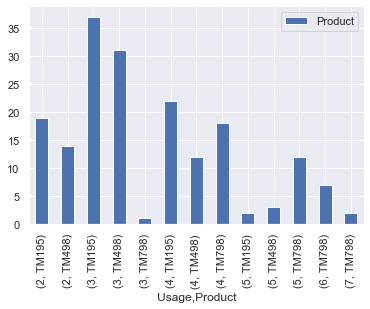

In [18]:
#Multivariate Data Analysis and Visualization

cgf.groupby(['Usage','Product'])[["Product"]].count().plot(kind='bar'); #plot the counts for the Treadmill Product based on their usage

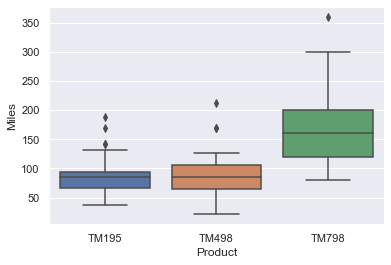

In [19]:
#Multivariate Data Analysis and Visualization
sns.boxplot(cgf['Product'], cgf['Miles']); #plot the density of miles vs product showing on which treadmill products users do more miles

<font color='green'><b>
    Observation:</b></font><br>
    <font color='purple'><b>
    50% of the TM195 users, use the product between 60-100miles<br>
    50% of the TM498 users, use the product between 60-110miles<br>
    50% of the TM798 users, use the product between 120-200miles<br>
Users of TM798 plans to use the product more compared to TM195 and TM498

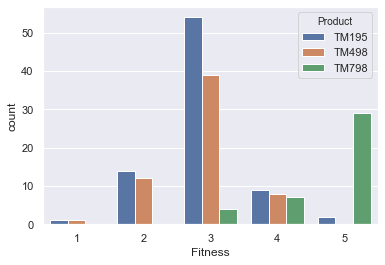

In [20]:
#Multivariate Data Analysis and Visualization
sns.countplot(x=cgf['Fitness'],hue=cgf['Product']);

<font color='green'><b>
    Observation:</b></font><br>
    <font color='purple'><b>
    Highest fitness level is achieved by the users of TM798.<br>
    Most of the users of TM195 and TM498 have fitness level 3.

In [21]:
#Understanding the structure of the data

#create dataframe with all columns per product model

user_TM195=cgf.loc[cgf['Product'] == 'TM195'].iloc[:]
user_TM498=cgf.loc[cgf['Product'] == 'TM498'].iloc[:]
user_TM798=cgf.loc[cgf['Product'] == 'TM798'].iloc[:]

In [22]:
#Understanding the structure of the data

#describe the users of TM195

print(user_TM195.describe(include='all'))

       Product        Age  Gender  Education MaritalStatus Age Group  \
count       80  80.000000      80  80.000000            80        80   
unique       1        NaN       2        NaN             2         4   
top      TM195        NaN  Female        NaN     Partnered     20-30   
freq        80        NaN      40        NaN            48        49   
mean       NaN  28.550000     NaN  15.037500           NaN       NaN   
std        NaN   7.221452     NaN   1.216383           NaN       NaN   
min        NaN  18.000000     NaN  12.000000           NaN       NaN   
25%        NaN  23.000000     NaN  14.000000           NaN       NaN   
50%        NaN  26.000000     NaN  16.000000           NaN       NaN   
75%        NaN  33.000000     NaN  16.000000           NaN       NaN   
max        NaN  50.000000     NaN  18.000000           NaN       NaN   

       Income Group      Usage   Fitness       Income       Miles  \
count            80  80.000000  80.00000     80.00000   80.000000 

In [23]:
#Understanding the structure of the data
print(user_TM498.describe())

             Age  Education      Usage   Fitness        Income       Miles  \
count  60.000000  60.000000  60.000000  60.00000     60.000000   60.000000   
mean   28.900000  15.116667   3.066667   2.90000  48973.650000   87.933333   
std     6.645248   1.222552   0.799717   0.62977   8653.989388   33.263135   
min    19.000000  12.000000   2.000000   1.00000  31836.000000   21.000000   
25%    24.000000  14.000000   3.000000   3.00000  44911.500000   64.000000   
50%    26.000000  16.000000   3.000000   3.00000  49459.500000   85.000000   
75%    33.250000  16.000000   3.250000   3.00000  53439.000000  106.000000   
max    48.000000  18.000000   5.000000   4.00000  67083.000000  212.000000   

       ProductCountByAgeGroup  ProductCountByIncomeGroup  
count                    60.0                       60.0  
mean                      0.0                        0.0  
std                       0.0                        0.0  
min                       0.0                        0.0  
25

In [24]:
#Understanding the structure of the data
print(user_TM798.describe())

             Age  Education      Usage    Fitness        Income       Miles  \
count  40.000000  40.000000  40.000000  40.000000      40.00000   40.000000   
mean   29.100000  17.325000   4.775000   4.625000   75441.57500  166.900000   
std     6.971738   1.639066   0.946993   0.667467   18505.83672   60.066544   
min    22.000000  14.000000   3.000000   3.000000   48556.00000   80.000000   
25%    24.750000  16.000000   4.000000   4.000000   58204.75000  120.000000   
50%    27.000000  18.000000   5.000000   5.000000   76568.50000  160.000000   
75%    30.250000  18.000000   5.000000   5.000000   90886.00000  200.000000   
max    48.000000  21.000000   7.000000   5.000000  104581.00000  360.000000   

       ProductCountByAgeGroup  ProductCountByIncomeGroup  
count                    40.0                       40.0  
mean                      0.0                        0.0  
std                       0.0                        0.0  
min                       0.0                       

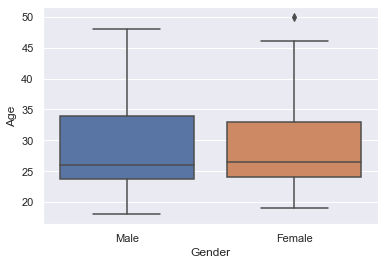

In [25]:
#Multivariate Data Analysis and Visualization
sns.boxplot(x="Gender", y="Age", data=cgf);

<font color='green'><b>
    Observation:</b></font><br>
    <font color='purple'><b>
    50% of the male users' age lie between 24-34 years, IQR=10, Male age range 18-48 years.<br>
    50% of the female users' age lie between 24-33 years, IQR=9, Male age range 19-46 years, with one outlier at 50 years.<br>
    

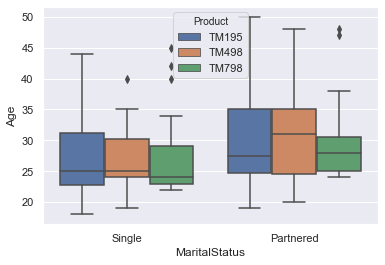

In [26]:
#Multivariate Data Analysis and Visualization
sns.boxplot(cgf['MaritalStatus'], cgf['Age'], hue=cgf['Product']);

<font color='green'><b>
    Observation:</b></font><br>
    <font color='purple'><b>
    Mean Age for each product for different Marital Status:<br><br>
TM195 Single= 25<br>
TM195 Partnered= 27<br>
    <br>
TM498 Single= 25<br>
TM498 Partnered= 31<br>
    <br>
TM798 Single= 24<br>
TM798 Partnered= 27<br>

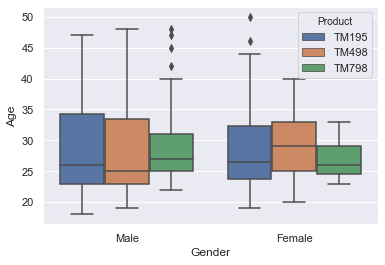

In [27]:
#Multivariate Data Analysis and Visualization
sns.boxplot(cgf['Gender'], cgf['Age'], hue=cgf['Product']);

<font color='green'><b>
    Observation:</b></font><br>
    <font color='purple'><b>
    50% of male TM195 users' age lie between 23-34 years.<br>
    50% of female TM195 users' age lie between 24-32 years.<br><br>
<font color='purple'><b>    
    50% of male TM498 users' age lie between 23-33 years.<br>
    50% of female TM498 users' age lie between 25-33 years.<br><br>
 <font color='purple'><b>   
    50% of male TM798 users' age lie between 25-31 years.<br>
    50% of female TM798 users' age lie between 24-29 years.<br>
    

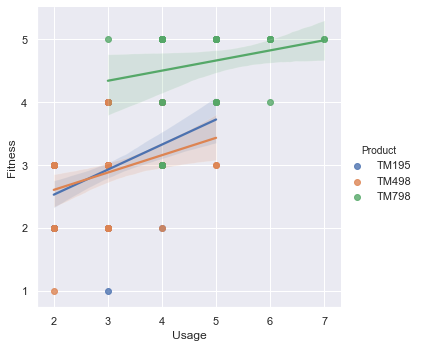

In [28]:
#Multivariate Data Analysis and Visualization
sns.lmplot(y="Fitness", x="Usage", hue="Product",data=cgf);

<font color='green'><b>
    Observation:</b></font><br>
    <font color='purple'><b>
    Between TM195 and TM498, users achieve better fitness levels with TM195 when used for same times in a week.<br>
    Fitness levels of users of TM798 lies between 4 and 5 when used 3-7 times a week.
   

<font color='green'><b>
    Conclusion:</b></font><br>
    <font color='blue'>
    Most of the users of the treadmill products have income in the range of 30k-60k<br><br>
    Top Product is TM195 with 80 occurances.<br><br>
    Top users are Male with 104 occurances.<br><br>
    Top Marital Status is Partnered with 107 occurances.<br><br>
    In every age group, TM195 is the popular product with being most popular in 20-30 age group, except in 30-40 where TM498 is
    more popular.<br><br>
    TM798 is popular in higher income group.<br><br>
    All the treadmill product models are more popular among people with partners.<br><br>
    TM195 is favored equally by males and females.<br><br>
    TM498 is favored slightly more by males.<br><br>
    TM798 is highly favored by males.<br><br>
    Users of TM798 plans to use the product more compared to TM195 and TM498.<br><br>
    Highest fitness level is achieved by the users of TM798.<br><br>
    Most of the users of TM195 and TM498 have fitness level 3.<br><br>
    </font>



<font color='green'><b>
    Recommendations:</b></font><br>
    <font color='blue'>
    Since the users of TM798 tend to have high fitness levels, the company can run some promotions on TM798 for fitness
    enthusiats to boost the sales of the model.
    <br><br>
    Since TM798 is less popular in females, company should run special promotions for females to boost the sales.   
    <br>
    Since TM195 is a well liked product by both males and females, and quite popular in each age group, the company can run
    special promotions to boost the sale of model even higher.
    <br><br>
    Company can also run digital promotions for TM498 to show, how one can maximize its use to achieve highest fitness levels,
    this will make TM498 popular.
    <br><br>
    Company should also run promotions and fitness awareness campaigns for target groups with age below 20 years and above 40
    years, as the users in that age range are less.
    <br><br>
    </font>
    
        
    